# 4 - Regressão Logística e Classificação
Considere um conjunto de dados obtidos analisando imagens de câncer de mama, onde há o diagnóstico se o tumor é maligno ou benigno. Seu objetivo é desenvolver e avaliar modelos para realizar a classificação de câncer de mama em Maligno (1) ou Benigno (0). Esse modelo deve ter uma saída probabilística que indique a probabilidade de um tumor ser maligno. Você deverá cumprir os seguintes requerimentos:

1. Carregue o conjunto de dados Breast Cancer Wisconsin (Diagnostic) Data Set. Ele pode ser obtido através do sklearn.datasets, da UCI Machine Learning Repository ou do Kaggle.
2. Realize uma breve análise exploratória dos dados, criando ao menos 3 gráficos. Há desbalanceamento entre as classes? Extra: quais atributos são mais importantes para classificação?
3. Separe os dados em conjuntos de treino e teste, usando random_state = 42. Os dados de treino podem ser subdivididos em treino e validação de forma livre para ajustar hiperparâmetros.
4. Treine e avalie no conjunto de teste um modelo de regressão logística usando hiperparâmetros default e todos os dados de entrada, como baseline de desempenho. Lembre-se de normalizar os dados de entrada. As métricas de avaliação serão Acurácia, Precision, Recall, F1 score e AUC.
5. Treine pelo menos mais 3 modelos de regressão logística diferentes, treinando e avaliando nos conjuntos de treino e validação. Modelos diferentes incluem usar atributos diferentes, transformações não-lineares nos atributos (regressão logística polinomial) ou diferentes hiperparâmetros. Após isso, escolha o melhor desses modelos para retreinar com todos os dados de treino e avalie no conjunto de teste. Compare com o resultado com a baseline. Dica: pode-se utilizar o grid search.
6. Extra: utilize um modelo ainda não estudado na mentoria para realizar a classificação, avaliando no conjunto de teste. Compare os resultados.

###### Carregue o conjunto de dados Breast Cancer Wisconsin (Diagnostic) Data Set. Ele pode ser obtido através do sklearn.datasets, da UCI Machine Learning Repository ou do Kaggle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
from sklearn.datasets import load_breast_cancer

dataset_cancer = load_breast_cancer()

dataset_cancer;

In [82]:
df_cancer = pd.DataFrame(np.c_[dataset_cancer['data'], dataset_cancer['target']], columns = np.append(dataset_cancer['feature_names'], ['target']))
df_cancer_target = pd.Series(dataset_cancer.target) # Somente rótulos
df_cancer_feature = df_cancer.drop(['target'], axis = 1) #Somente features  
df_cancer

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


###### Realize uma breve análise exploratória dos dados, criando ao menos 3 gráficos. Há desbalanceamento entre as classes? Extra: quais atributos são mais importantes para classificação?

In [26]:
# Não há nenhum valor ausente, todas as colunas têm 569 valores. Isso nos economiza tempo de ter que considerar os valores ausentes.
# Todos os tipos de dados são numéricos.
df_cancer.info()

In [58]:
#df = df_cancer['target']==1
#df.value_counts()
#abaixo eu estou pegando e contando as targets e definindo os nomes das duas 
x=pd.Series(df_cancer_target.value_counts(ascending=True))
x.index="Maligno Benigno".split()
x
# MALIGNO É 0 E BENIGNO É 1
#Podemos observar que há uma maior quantidade de diagnóstico de tumores benignos, logo há um desbalanceamento entre as classes.

Maligno    212
Benigno    357
dtype: int64

In [36]:
df_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


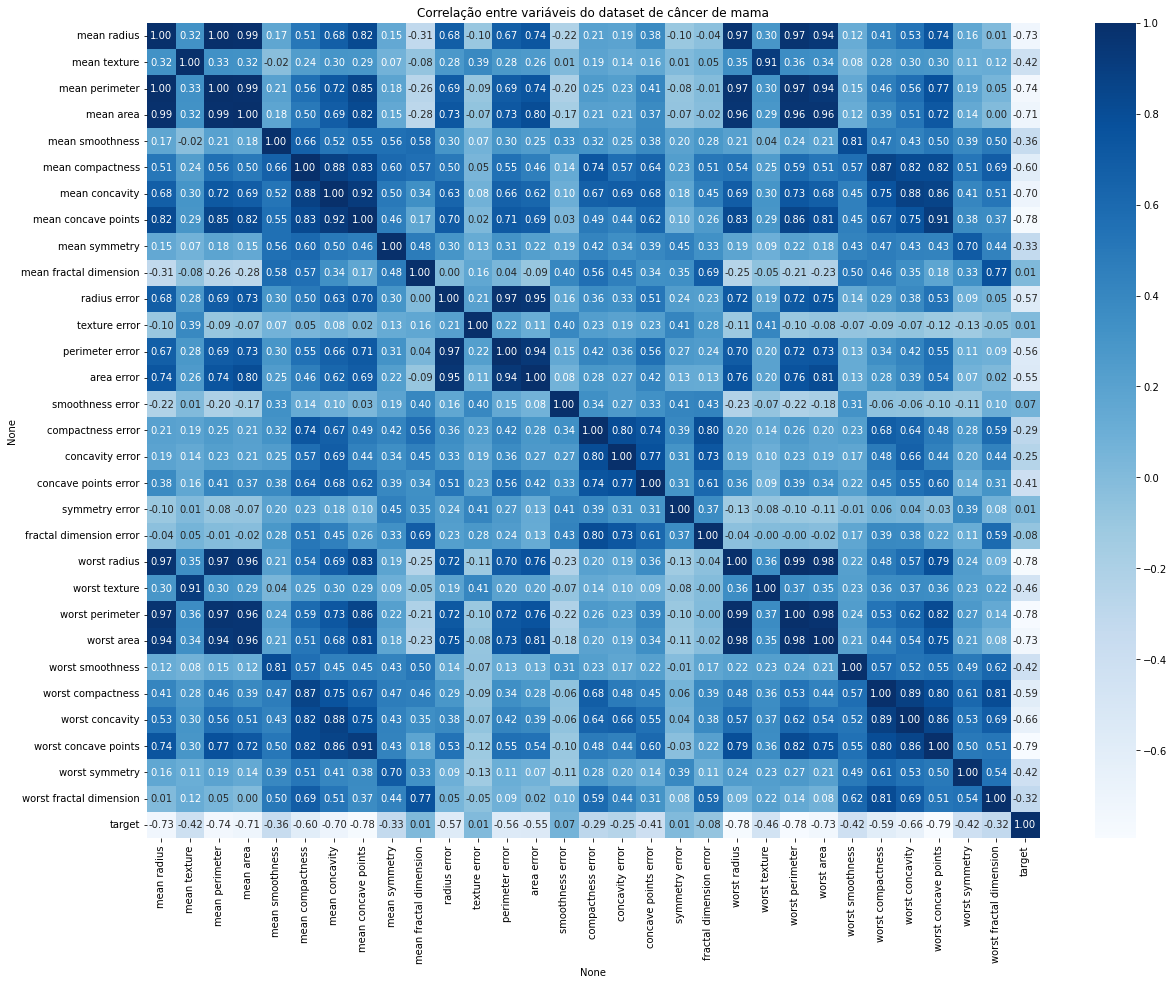

In [41]:
# Visualização 1
#Matriz de Correlação
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,15))
sns.heatmap(df_cancer.corr(),
            annot = True,
            fmt = '.2f',#deixando em duas casas decimais
            cmap='Blues')
plt.title('Correlação entre variáveis do dataset de câncer de mama')
plt.show()

c:\users\ruann\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

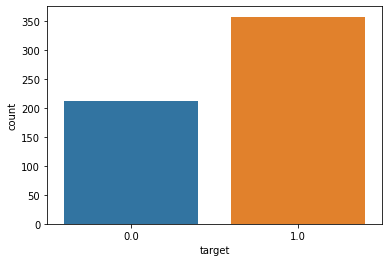

In [77]:
# Visualização 2
sns.countplot(df_cancer['target'])

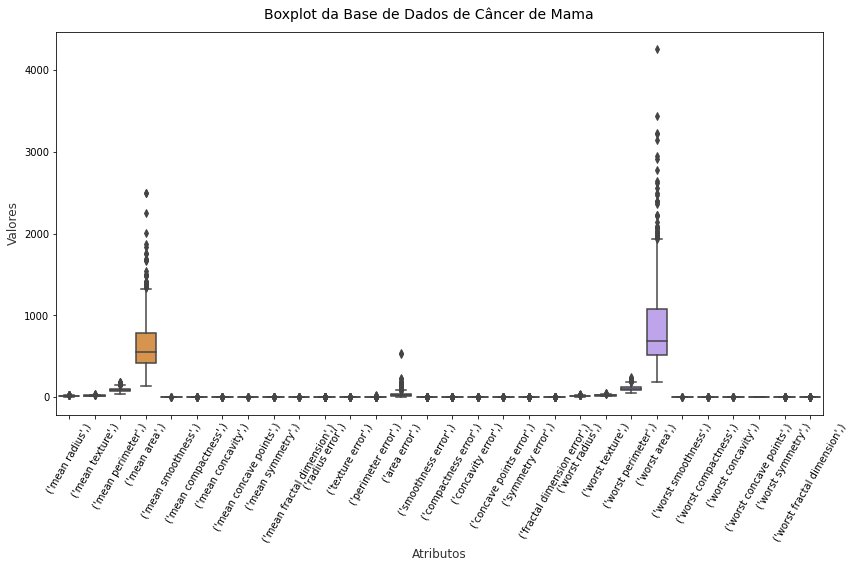

In [59]:
# Visualização 3
# Tamanho da figura
figsize=(12,8)
f, ax = plt.subplots(1, 1, figsize=figsize)
f.suptitle('Boxplot da Base de Dados de Câncer de Mama', fontsize=14)

sns.boxplot(data=df_cancer_feature,  ax=ax)
ax.set_xlabel("Atributos",size = 12,alpha=0.8)
ax.set_ylabel("Valores",size = 12,alpha=0.8)
plt.xticks(rotation=60)
plt.tight_layout()

<AxesSubplot:xlabel='mean area', ylabel='mean smoothness'>

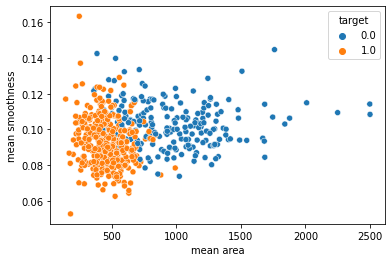

In [80]:
# Visualização 4
# Suavidade e área dos tumores foram os atributos escolhidos para essa visualização
sns.scatterplot(x='mean area', y='mean smoothness', hue='target', data=df_cancer)
# Os pontos azuis aqui é o caso maligno. A laranja aponta aqui que é o caso benigno.

###### Separe os dados em conjuntos de treino e teste, usando random_state = 42. Os dados de treino podem ser subdivididos em treino e validação de forma livre para ajustar hiperparâmetros.